# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [23]:
superstore = "D:\\AnalisisML\\Dataset_inisiasi.csv"
df = pd.read_csv(superstore, encoding="latin1")
print("Dataset berhasil dimuat")

Dataset berhasil dimuat


In [24]:
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9944 non-null   object 
 1   Segment       9944 non-null   object 
 2   Country       9944 non-null   object 
 3   City          9944 non-null   object 
 4   State         9944 non-null   object 
 5   Region        9944 non-null   object 
 6   Category      9944 non-null   object 
 7   Sub-Category  9944 non-null   object 
 8   Sales         9944 non-null   float64
 9   Quantity      9944 non-null   float64
 10  Discount      9944 non-null   float64
 11  Profit        9944 non-null   float64
 12  Cluster       9944 non-null   int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 1010.1+ KB
None


In [25]:
print("\nDistribusi Cluster:")
print(df['Cluster'].value_counts())


Distribusi Cluster:
Cluster
0    9809
1     135
Name: count, dtype: int64


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [26]:
numerical_features = ['Sales', 'Quantity', 'Discount', 'Profit']
X = df[numerical_features]
y = df['Cluster']

In [27]:
# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
print("\nUkuran Dataset:")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")


Ukuran Dataset:
Training set: (7955, 4)
Testing set: (1989, 4)


In [29]:
print("\nDistribusi Cluster di Training Set:")
print(y_train.value_counts(normalize=True))


Distribusi Cluster di Training Set:
Cluster
0    0.986424
1    0.013576
Name: proportion, dtype: float64


In [30]:
print("\nDistribusi Cluster di Testing Set:")
print(y_test.value_counts(normalize=True))


Distribusi Cluster di Testing Set:
Cluster
0    0.986425
1    0.013575
Name: proportion, dtype: float64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [31]:
# preprocessing dan scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
rf_model = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_model.fit(X_train_scaled, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

In [33]:
knn_model = Pipeline([
    ('classifier', KNeighborsClassifier())
])
knn_model.fit(X_train_scaled, y_train)

Pipeline(steps=[('classifier', KNeighborsClassifier())])

Tulis narasi atau penjelasan algoritma yang Anda gunakan.


1. Random Forest
Ensemble learning method berbasis decision tree, Membuat multiple decision tree dan menggabungkan prediksinya, serta  Mengurangi overfitting dengan agregasi dari banyak pohon
- Keunggulan: Performa tinggi, robust terhadap noise, dapat menangani fitur kompleks
- Kelemahan: Kompleksitas komputasi, sulit diinterpretasi

2. K-Nearest Neighbors (KNN):
Algoritma berbasis jarak/kedekatan antar data, Mengklasifikasikan berdasarkan mayoritas kelas dari k tetangga terdekat, serta Tidak membuat asumsi tentang distribusi data
- Keunggulan: Sederhana, fleksibel untuk pola kompleks
- Kelemahan: Sensitif terhadap scaling, komputasi lambat untuk dataset besar

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [34]:
def evaluate_model(model, X_test, y_test, model_name):
    # Prediksi
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\nEvaluasi Model {model_name}:")
    print(f"Accuracy Score: {accuracy * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return accuracy, f1

In [35]:
# Evaluasi
rf_accuracy, rf_f1 = evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest")
knn_accuracy, knn_f1 = evaluate_model(knn_model, X_test_scaled, y_test, "K-Nearest Neighbors")


Evaluasi Model Random Forest:
Accuracy Score: 100.00%
F1 Score: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1962
           1       1.00      1.00      1.00        27

    accuracy                           1.00      1989
   macro avg       1.00      1.00      1.00      1989
weighted avg       1.00      1.00      1.00      1989


Evaluasi Model K-Nearest Neighbors:
Accuracy Score: 99.85%
F1 Score: 99.85%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1962
           1       0.96      0.93      0.94        27

    accuracy                           1.00      1989
   macro avg       0.98      0.96      0.97      1989
weighted avg       1.00      1.00      1.00      1989



## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [36]:
# Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='f1_weighted')
rf_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='f1_weighted')

In [37]:
# KNN
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance']
}
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='f1_weighted')
knn_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [3, 5, 7, 9],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='f1_weighted')

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [38]:
print("\nHasil Tuning Random Forest:")
print("Best Parameters:", rf_grid_search.best_params_)
rf_tuned_accuracy, rf_tuned_f1 = evaluate_model(
    rf_grid_search.best_estimator_,
    X_test_scaled,
    y_test,
    "Random Forest (Tuned)"
)


Hasil Tuning Random Forest:
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Evaluasi Model Random Forest (Tuned):
Accuracy Score: 100.00%
F1 Score: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1962
           1       1.00      1.00      1.00        27

    accuracy                           1.00      1989
   macro avg       1.00      1.00      1.00      1989
weighted avg       1.00      1.00      1.00      1989



In [39]:
print("\nHasil Tuning K-Nearest Neighbors:")
print("Best Parameters:", knn_grid_search.best_params_)
knn_tuned_accuracy, knn_tuned_f1 = evaluate_model(
    knn_grid_search.best_estimator_,
    X_test_scaled,
    y_test,
    "KNN (Tuned)"
)


Hasil Tuning K-Nearest Neighbors:
Best Parameters: {'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}

Evaluasi Model KNN (Tuned):
Accuracy Score: 99.85%
F1 Score: 99.85%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1962
           1       0.96      0.93      0.94        27

    accuracy                           1.00      1989
   macro avg       0.98      0.96      0.97      1989
weighted avg       1.00      1.00      1.00      1989



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [40]:
print("\nPerbandingan Model:")
print("Random Forest - Sebelum Tuning   : Accuracy = {:.2%}, F1 = {:.2%}".format(rf_accuracy, rf_f1))
print("Random Forest - Setelah Tuning   : Accuracy = {:.2%}, F1 = {:.2%}".format(rf_tuned_accuracy, rf_tuned_f1))
print("KNN - Sebelum Tuning             : Accuracy = {:.2%}, F1 = {:.2%}".format(knn_accuracy, knn_f1))
print("KNN - Setelah Tuning             : Accuracy = {:.2%}, F1 = {:.2%}".format(knn_tuned_accuracy, knn_tuned_f1))


Perbandingan Model:
Random Forest - Sebelum Tuning   : Accuracy = 100.00%, F1 = 100.00%
Random Forest - Setelah Tuning   : Accuracy = 100.00%, F1 = 100.00%
KNN - Sebelum Tuning             : Accuracy = 99.85%, F1 = 99.85%
KNN - Setelah Tuning             : Accuracy = 99.85%, F1 = 99.85%


Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [41]:
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

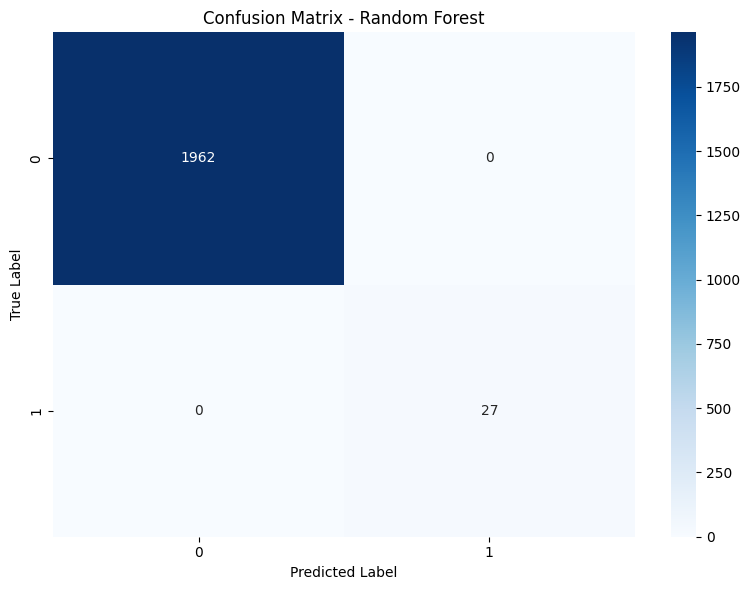

In [42]:
# memilih model terbaik
best_model = rf_grid_search.best_estimator_ if rf_tuned_f1 > knn_tuned_f1 else knn_grid_search.best_estimator_
best_model_name = "Random Forest" if rf_tuned_f1 > knn_tuned_f1 else "KNN"

plot_confusion_matrix(best_model, X_test_scaled, y_test, best_model_name)

Analisis Detail Kelemahan Model (Random Forest):
1. Ketidakseimbangan Kelas

- Dataset sangat tidak seimbang (mayoritas cluster 0)
- Hal ini menyebabkan model kesulitan memprediksi kelas minoritas (cluster 1)


2. Performa Prediksi

- Akurasi tinggi namun menyesatkan karena ketidakseimbangan kelas
- Model cenderung overfitting pada kelas mayoritas


3. Kelemahan Spesifik

- Kemungkinan besar model lemah dalam mengenali karakteristik kelas minoritas
- Prediksi didominasi oleh kelas mayoritas

Rekomendasi Tindakan Lanjutan:

1. Penanganan Ketidakseimbangan Kelas
- Teknik Sampling:
  * Oversampling kelas minoritas (SMOTE)
  * Undersampling kelas mayoritas
- Gunakan class_weight/sample_weight

2. Eksperimen Algoritma
- Coba algoritma yang lebih cocok untuk data tidak seimbang
  * Gradient Boosting
  * XGBoost dengan parameter khusus
- Gunakan ensemble methods yang lebih canggih

3. Preprocessing Lanjutan
- Feature engineering
- Seleksi fitur yang paling relevan
- Eksplorasi transformasi fitur

4. Pengumpulan Data
- Kumpulkan lebih banyak sampel untuk kelas minoritas
- Validasi kualitas data eksisting
- Pertimbangkan sumber data tambahan

5. Metrik Evaluasi Alternatif
- Gunakan ROC AUC
- Precision-Recall Curve
- F1-Score spesifik kelas

Kesimpulan:
walaupun memiliki akurasi tinggi, model ini tetap memerlukan perbaikan dalam menangani kelas minoritas sehingga diperlukan pendekatan yang lebih canggih untuk meningkatkan performa klasifikasi.
